## Imports und Weissemodell

In [47]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import seaborn as sns
import pandas as pd
import qtb_plot

In [4]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

### plot Art

In [5]:
qtb_plot.set("notebook")

### model einlesen

In [6]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
changedValuesOverTimeArray = s.timeCourse(np.linspace(0,10000,100),weise_values);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


### Funktion für Flusskontrollkoefizienten

In [21]:
def C(v,vt,x):
    # parameter den ich verändere
    veränderterPar = defaultParameters[vt]
    # wachstumswerte
    Rate = s.getRate(v)[-1]
    # um prozentzahl erhöhen oder erniedrigen
    d1V = veränderterPar*(1+(x*0.01))
    d2V = veränderterPar*(1-(x*0.01))
    
    def dv(vt):
        s1 = modelbase.Simulator(m)
        s1.model.par.update({vt:d1V})
        s1.timeCourse(np.linspace(0,3000,100),weise_values)
        a = s1.getRate(v)[-1]
        
        s2 = modelbase.Simulator(m)
        s2.model.par.update({vt:d2V})
        s2.timeCourse(np.linspace(0,3000,100),weise_values)
        b = s2.getRate(v)[-1]
        
        s1.model.par.update({vt: veränderterPar})
        s2.model.par.update({vt: veränderterPar})
        
        #print(a)
        #print(b)
        #print(a-b)
        
        return a-b
    return (dv(vt)/Rate)*(veränderterPar/(d1V-d2V))

### loop über alle Raten

In [26]:
parameter = ['dm','gammamax', 'vt', 'vm', 'wr', 'wt', 'wm', 'wq','kb', 'ku']






vimpc = [] 
vcatc = []
vrc = []
vtc = []
vmc = []
vqc = []
omegarc = []
omegatc = []
omegamc = []
omegaqc = []



for i in parameter:
    #dmc.append(C('dm',i,1))
    #gammamaxc.append(C('gammamax',i,1))
    vimpc.append(C('vimp',i,1))
    vcatc.append(C('vcat',i,1))
    vrc.append(C('vr',i,1))
    vtc.append(C('vt',i,1))
    vmc.append(C('vm',i,1))
    vqc.append(C('vq',i,1))
    omegarc.append(C('omegar',i,1))
    omegatc.append(C('omegat',i,1))
    omegamc.append(C('omegam',i,1))
    omegaqc.append(C('omegaq',i,1))
    #kbc.append(C('kb',i,1))
    #kuc.append(C('ku',i,1))
    
    

### Kontrolle ob die auf 1 kommen

In [28]:
sum(vimpc)

1.0000028666018606

# Plots zu Flusskoefizienten

In [62]:
parameter = ['mRNA-Abbaurate','max. Translationselongationsrate', 'max. Nährstoffimportrate', 'max. enzymatische Rate', 'max. ribosomen Transkriptionsrate', 'max. transport Transkriptionsrate', 'max. methabolische Transkriptionsrate', 'max. q-Transkriptionsrate','mRNA-Ribosomen-Bindungsrate', 'mRNA-Ribosomen-Dissoziationsrate']


In [65]:
parameter = ['$d_{m}$','$\gamma_{max}$', '$v_{t}$', '$v_{m}$', '$w_{r}$', '$w_{t}$', '$w_{m}$', '$w_{q}$','$k_{b}$', '$k_{u}$']


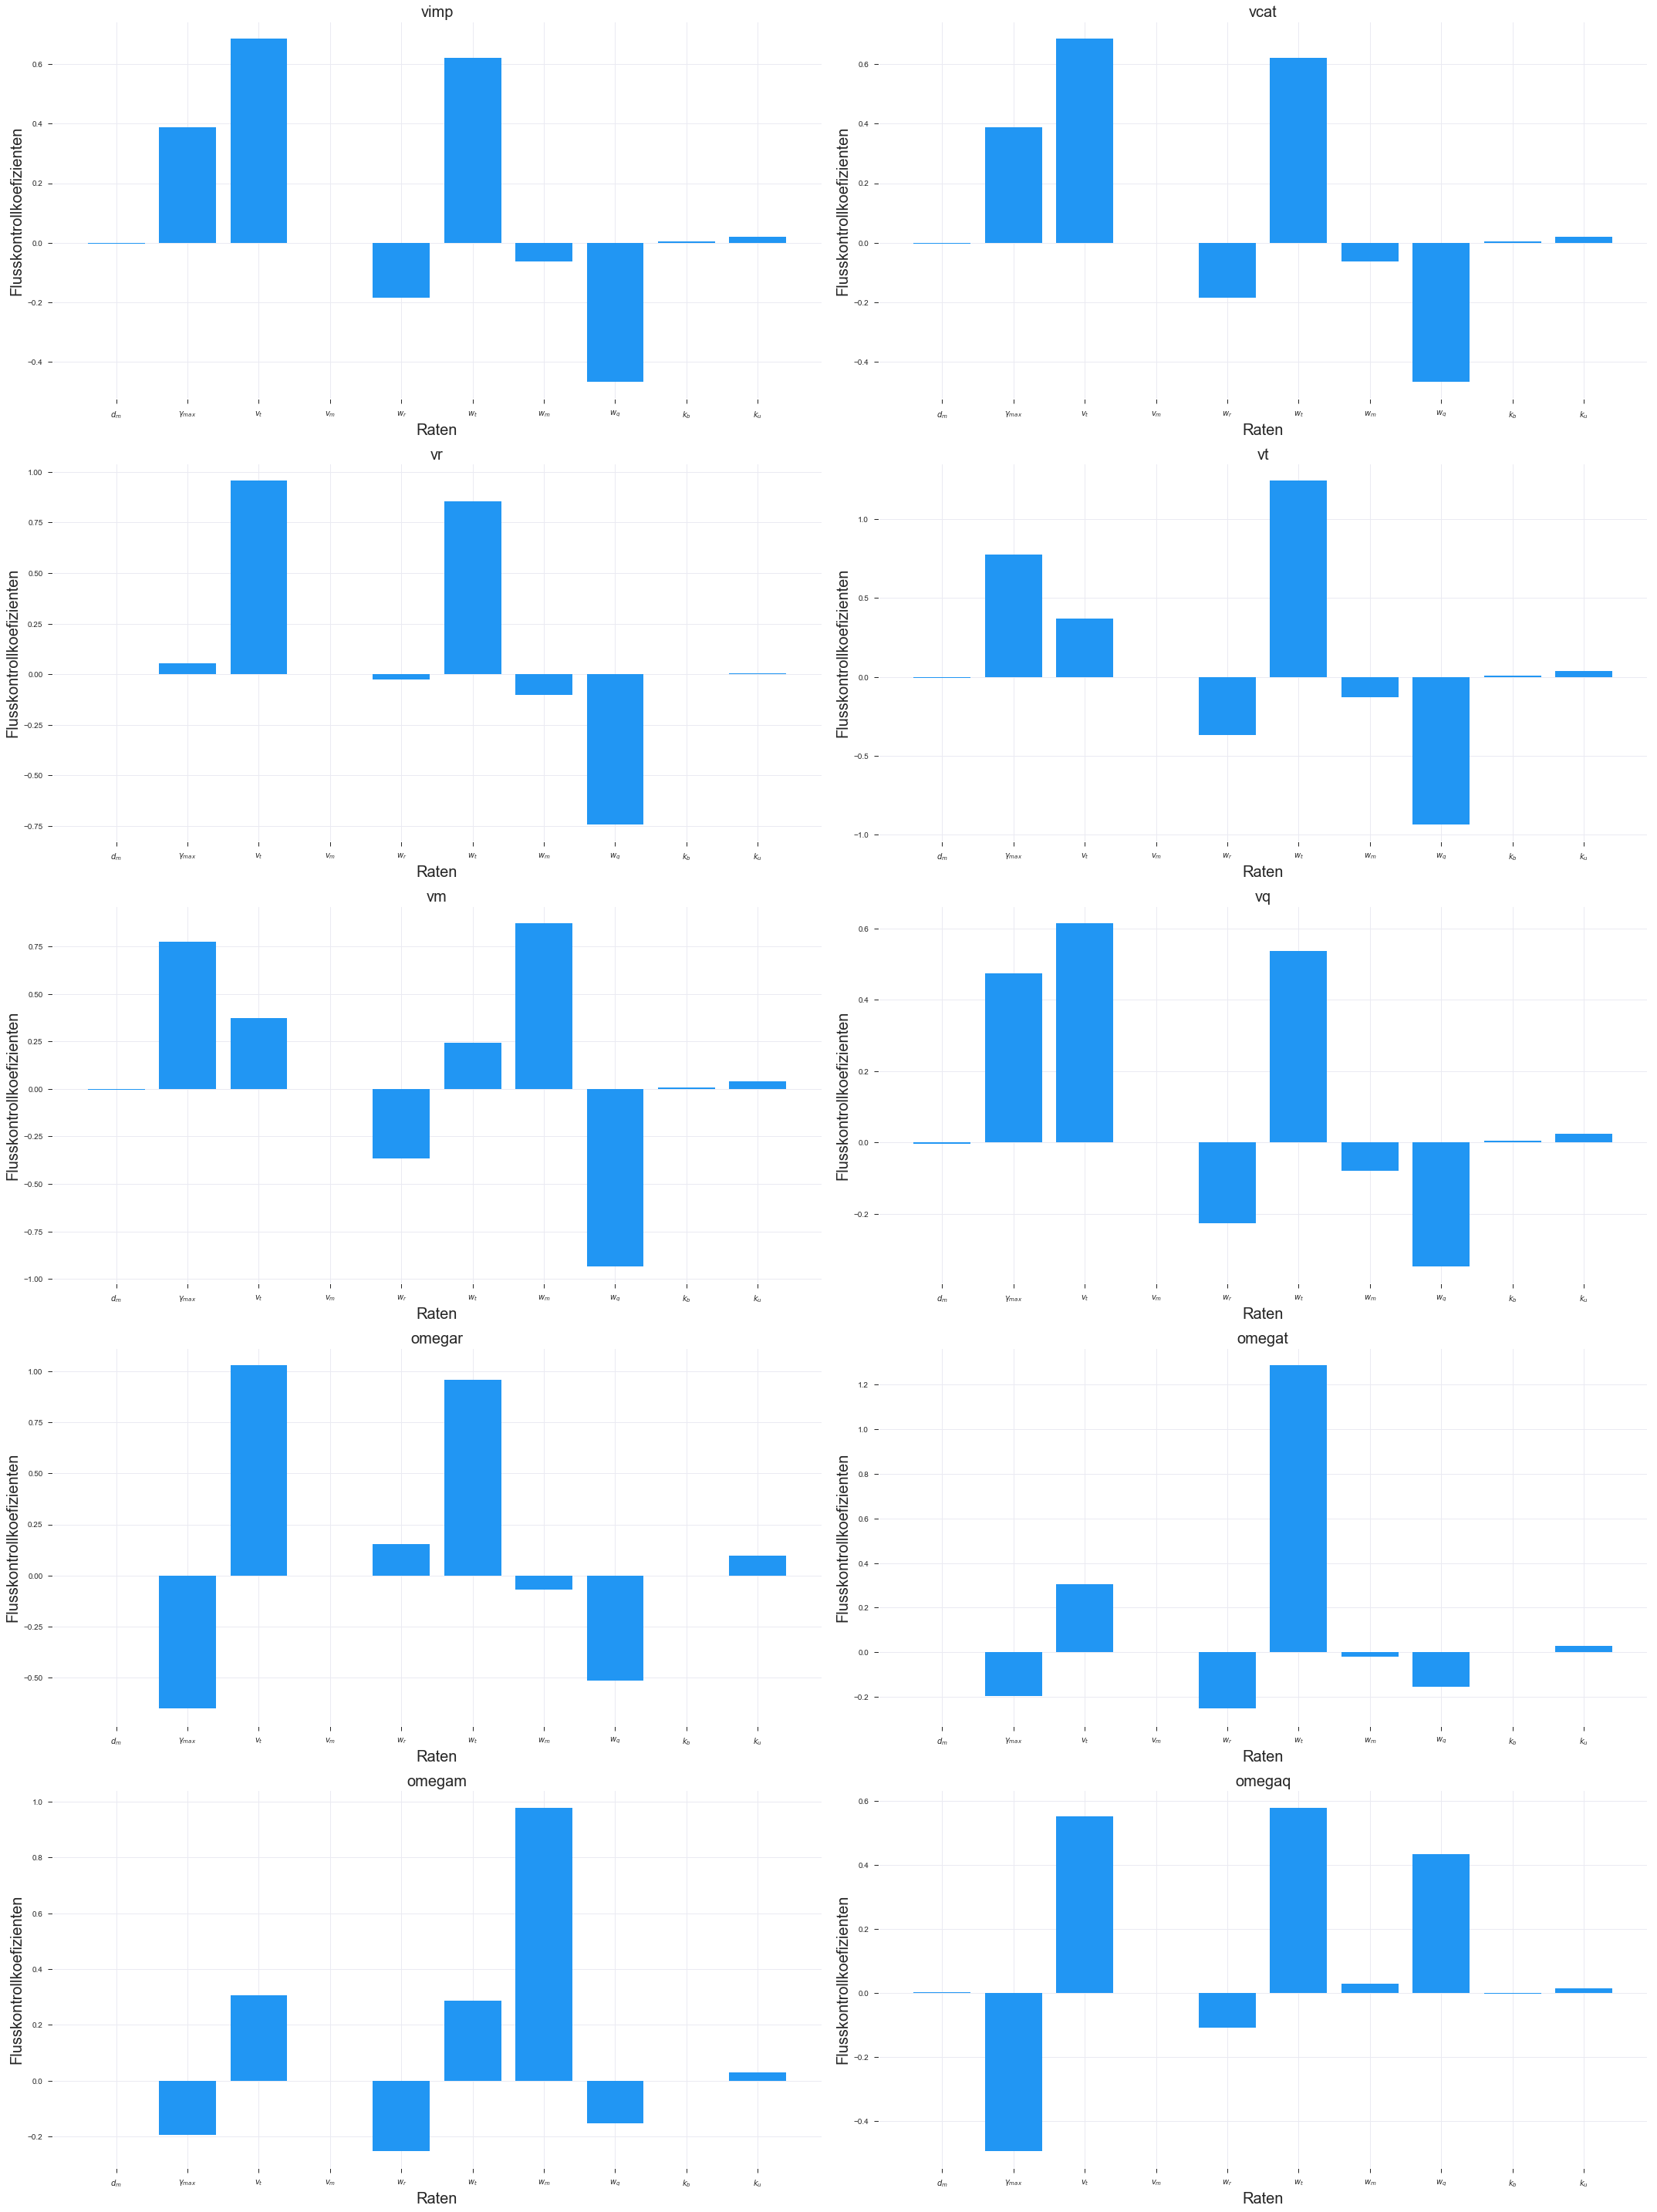

In [66]:
fig, Plotlist = plt.subplots(5,2,figsize=(30,40))
Plotlist = Plotlist.ravel()

x = parameter
y = vimpc
Plotlist[0].bar(x,y)
Plotlist[0].set_title('vimp', size = 20)
Plotlist[0].set_xlabel('Raten', size = 20)
Plotlist[0].set_ylabel('Flusskontrollkoefizienten', size = 20)


x = parameter
y = vcatc
Plotlist[1].bar(x,y)
Plotlist[1].set_title('vcat', size = 20)
Plotlist[1].set_xlabel('Raten', size = 20)
Plotlist[1].set_ylabel('Flusskontrollkoefizienten', size = 20)

x = parameter
y = vrc
Plotlist[2].bar(x,y)
Plotlist[2].set_title('vr', size = 20)
Plotlist[2].set_xlabel('Raten', size = 20)
Plotlist[2].set_ylabel('Flusskontrollkoefizienten', size = 20)

x = parameter
y = vtc
Plotlist[3].bar(x,y)
Plotlist[3].set_title('vt', size = 20)
Plotlist[3].set_xlabel('Raten', size = 20)
Plotlist[3].set_ylabel('Flusskontrollkoefizienten', size = 20)

x = parameter
y = vmc
Plotlist[4].bar(x,y)
Plotlist[4].set_title('vm', size = 20)
Plotlist[4].set_xlabel('Raten', size = 20)
Plotlist[4].set_ylabel('Flusskontrollkoefizienten', size = 20)

x = parameter
y = vqc
Plotlist[5].bar(x,y)
Plotlist[5].set_title('vq', size = 20)
Plotlist[5].set_xlabel('Raten', size = 20)
Plotlist[5].set_ylabel('Flusskontrollkoefizienten', size = 20)

x = parameter
y = omegarc
Plotlist[6].bar(x,y)
Plotlist[6].set_title('omegar', size = 20)
Plotlist[6].set_xlabel('Raten', size = 20)
Plotlist[6].set_ylabel('Flusskontrollkoefizienten', size = 20)

x = parameter
y = omegatc
Plotlist[7].bar(x,y)
Plotlist[7].set_title('omegat', size = 20)
Plotlist[7].set_xlabel('Raten', size = 20)
Plotlist[7].set_ylabel('Flusskontrollkoefizienten', size = 20)

x = parameter
y = omegamc
Plotlist[8].bar(x,y)
Plotlist[8].set_title('omegam', size = 20)
Plotlist[8].set_xlabel('Raten', size = 20)
Plotlist[8].set_ylabel('Flusskontrollkoefizienten', size = 20)

x = parameter
y = omegaqc
Plotlist[9].bar(x,y)
Plotlist[9].set_title('omegaq', size = 20)
Plotlist[9].set_xlabel('Raten', size = 20)
Plotlist[9].set_ylabel('Flusskontrollkoefizienten', size = 20)

fig.tight_layout()

<BarContainer object of 10 artists>

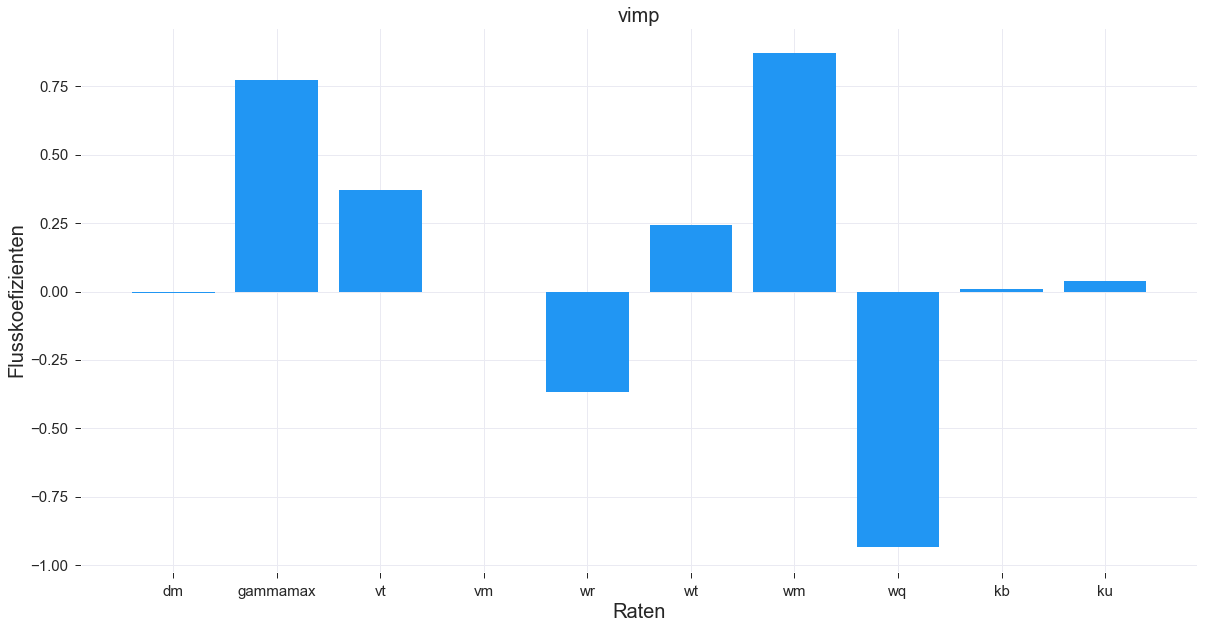

In [10]:
x = parameter
y = vimpc
plt.figure(figsize=(20,10))
plt.title('vimp', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

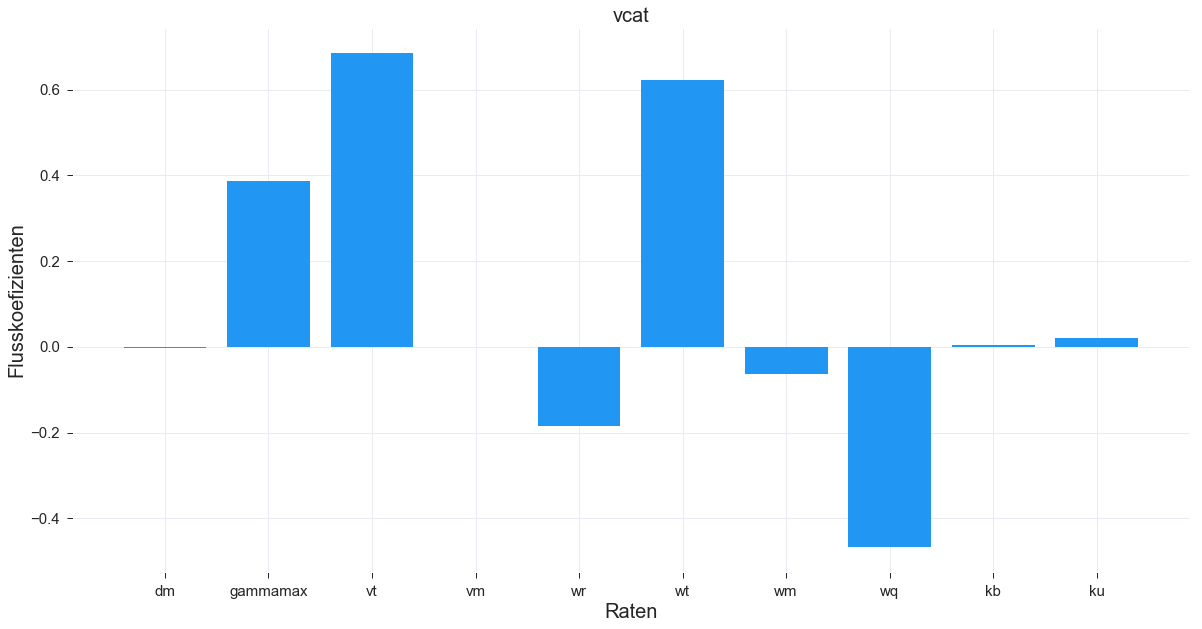

In [11]:
x = parameter
y = vcatc
plt.figure(figsize=(20,10))
plt.title('vcat', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

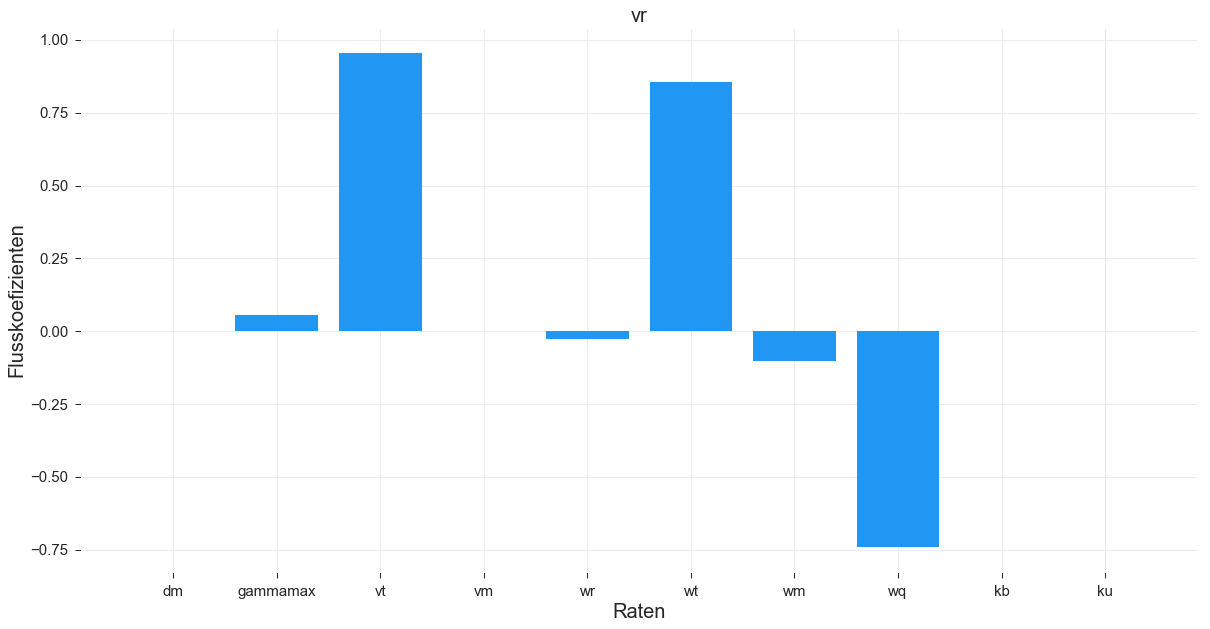

In [12]:
x = parameter
y = vrc
plt.figure(figsize=(20,10))
plt.title('vr', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

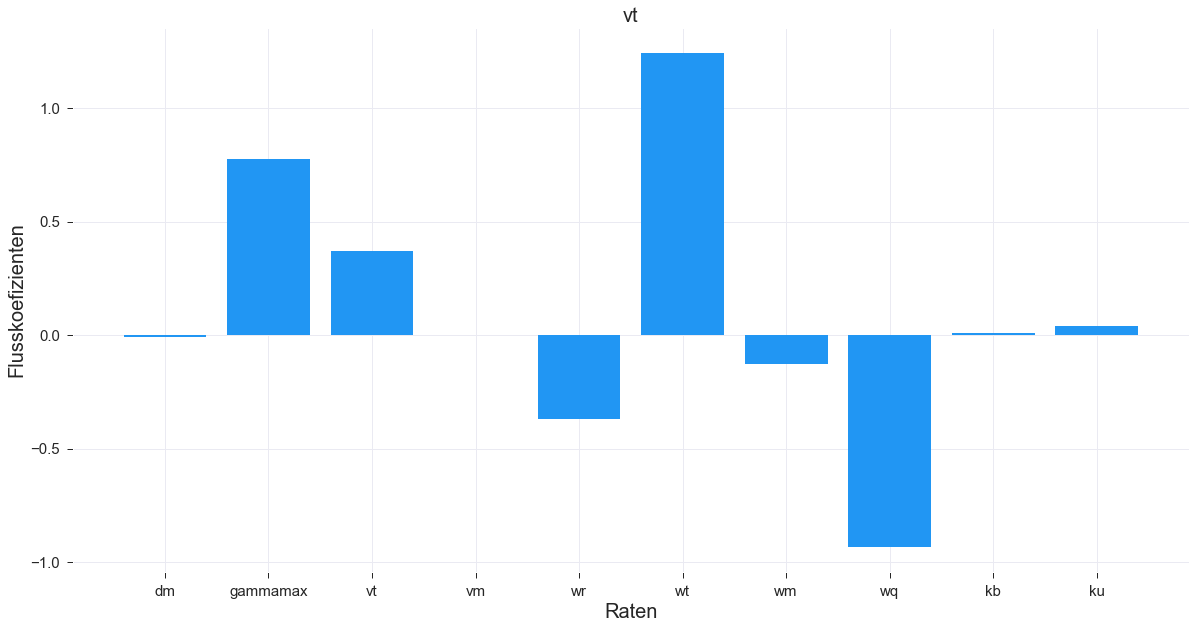

In [13]:
x = parameter
y = vtc
plt.figure(figsize=(20,10))
plt.title('vt', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

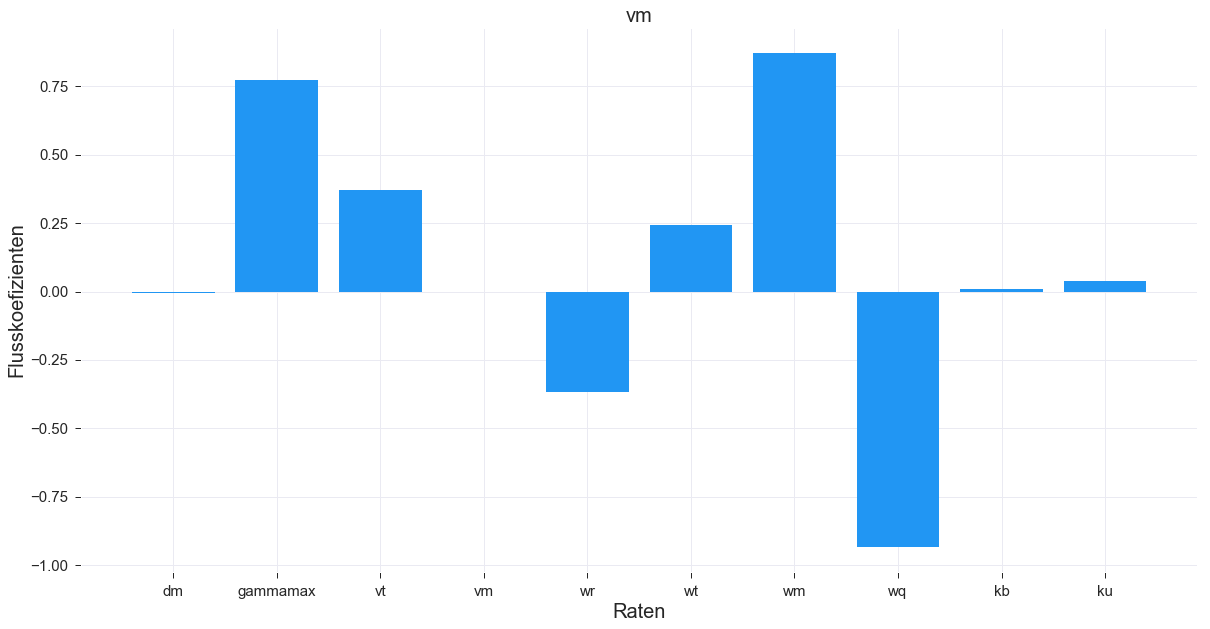

In [14]:
x = parameter
y = vmc
plt.figure(figsize=(20,10))
plt.title('vm', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

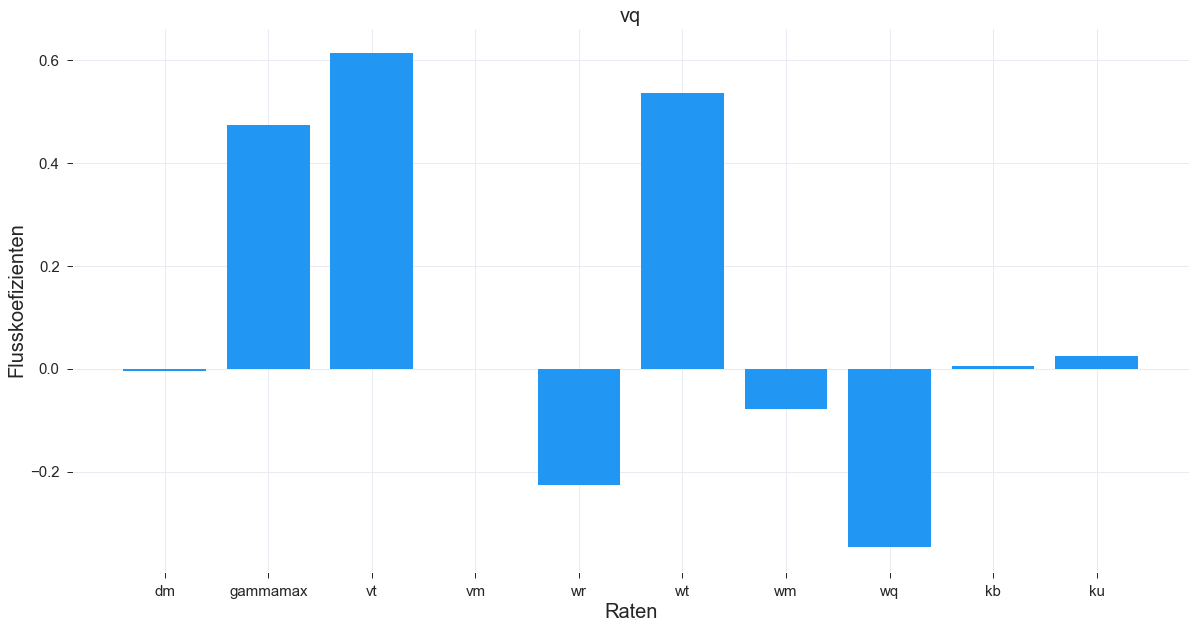

In [15]:
x = parameter
y = vqc
plt.figure(figsize=(20,10))
plt.title('vq', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

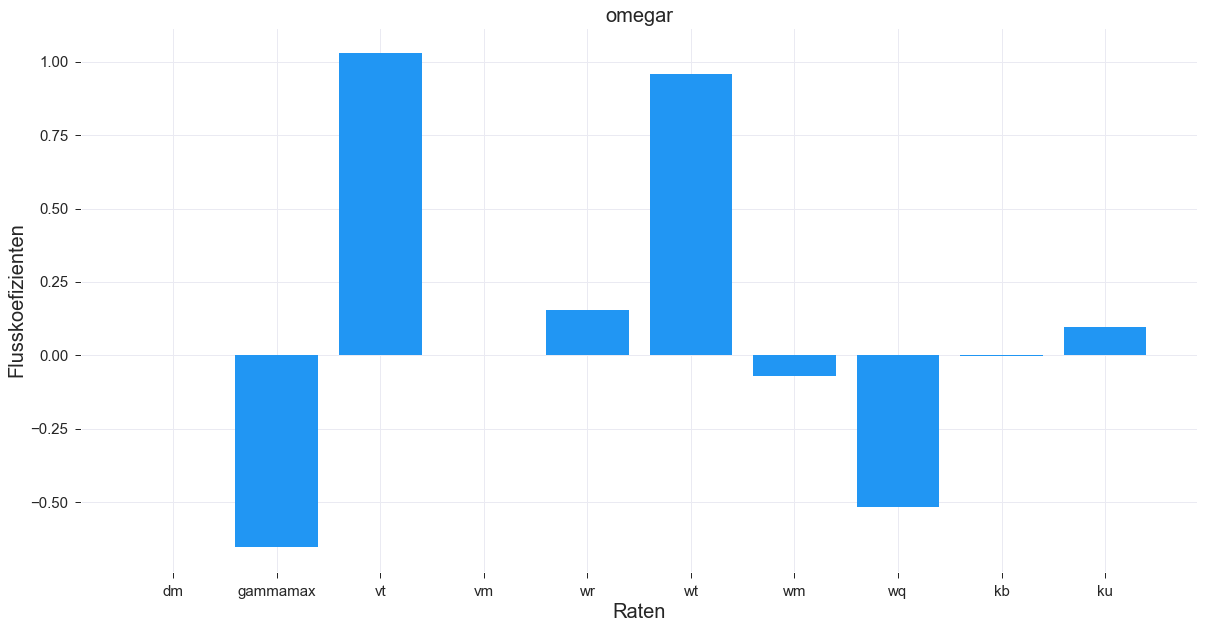

In [16]:
x = parameter
y = omegarc
plt.figure(figsize=(20,10))
plt.title('omegar', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

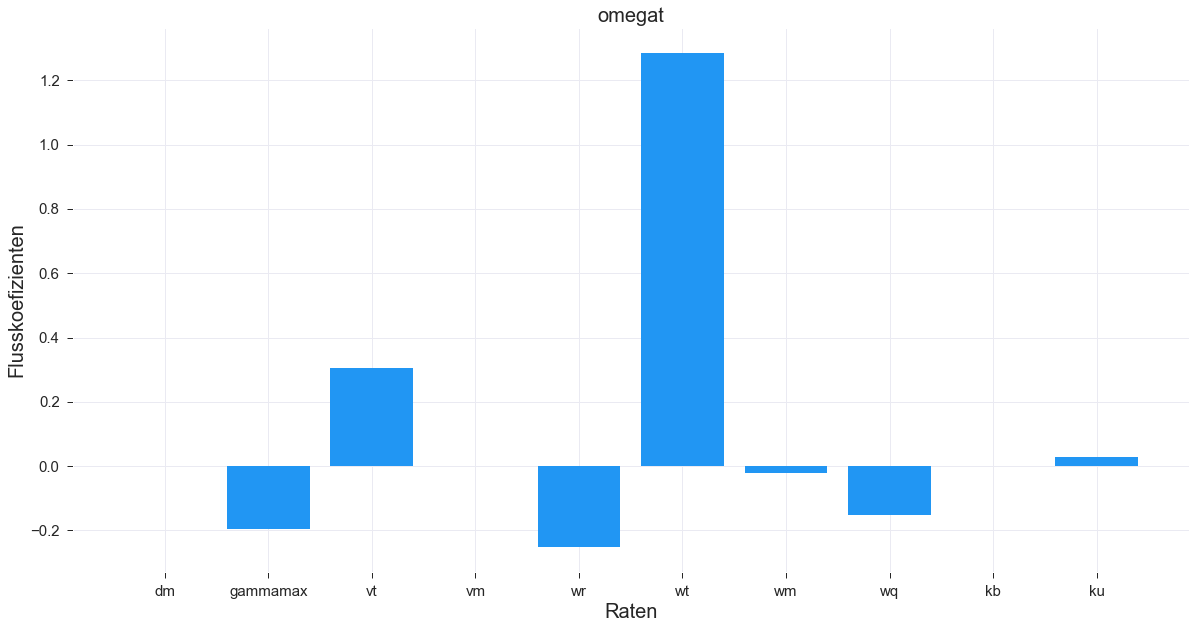

In [17]:
x = parameter
y = omegatc
plt.figure(figsize=(20,10))
plt.title('omegat', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

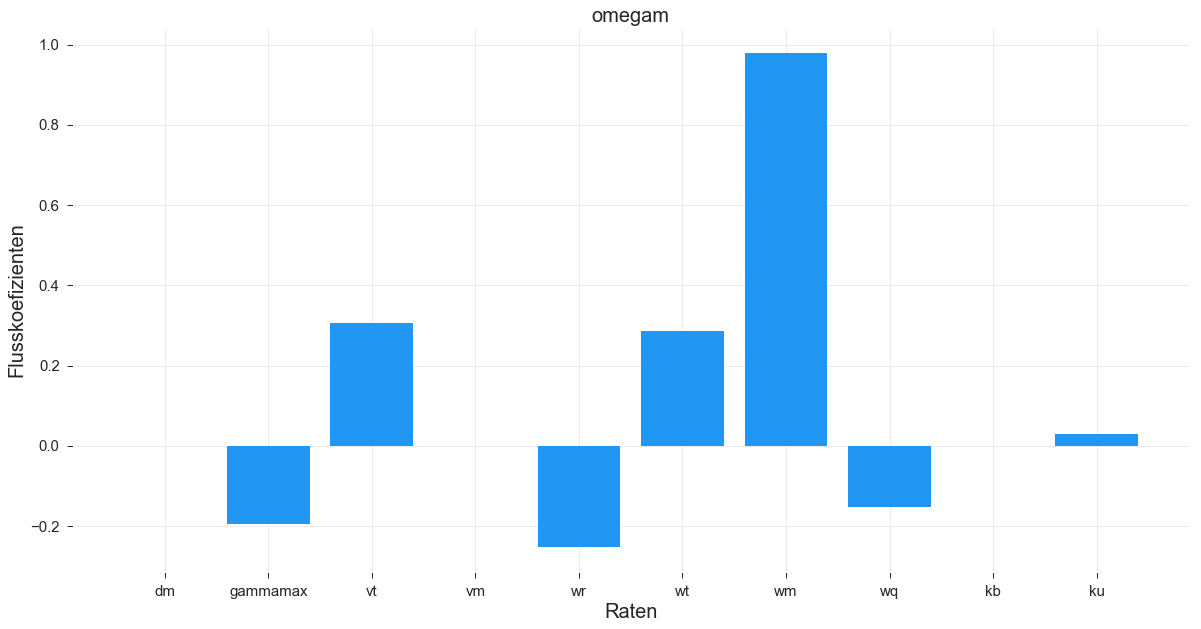

In [18]:
x = parameter
y = omegamc
plt.figure(figsize=(20,10))
plt.title('omegam', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 10 artists>

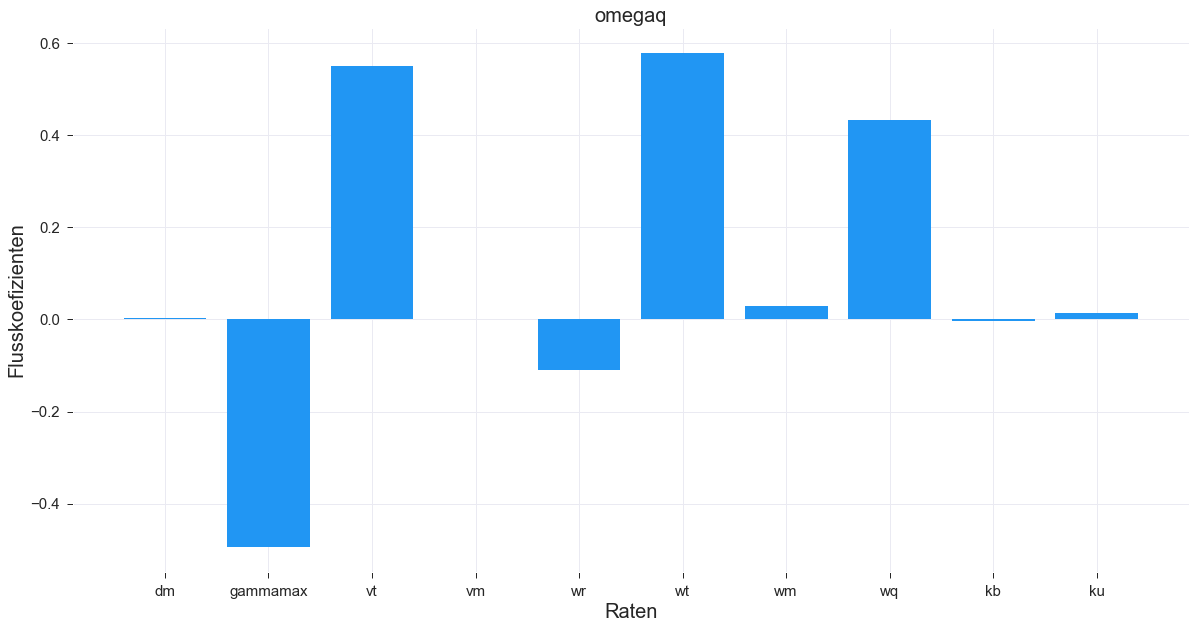

In [19]:
x = parameter
y = omegaqc
plt.figure(figsize=(20,10))
plt.title('omegaq', size = 20)
plt.xlabel('Raten', size = 20)
plt.ylabel('Flusskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)